# Sample measurements

**Scott Prahl**

**June 2024**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython

%config InlineBackend.figure_format='retina'

path = "/Users/prahl/Desktop/hide/iad-problems/BLI/2024-3-15-Transmission-Data/"

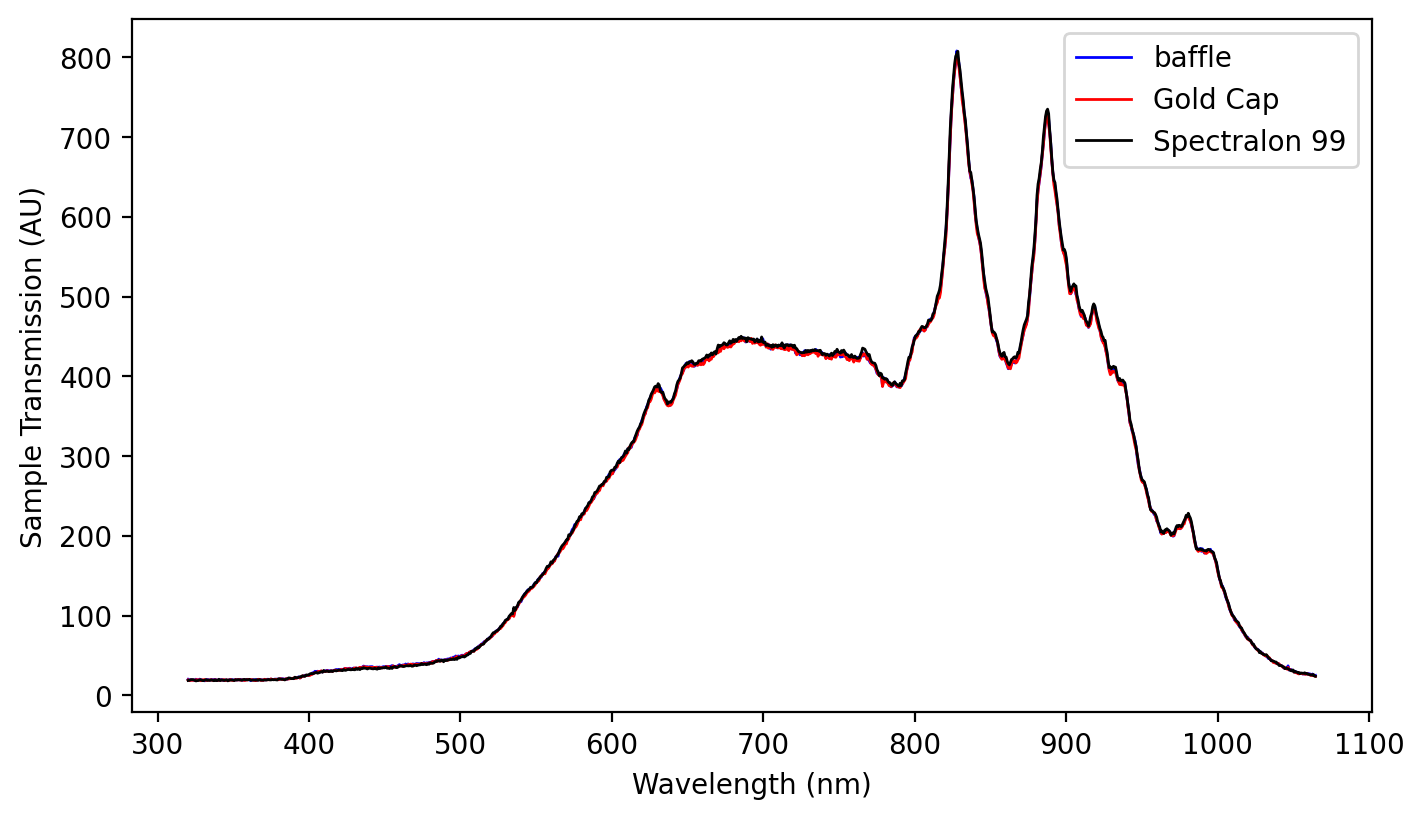

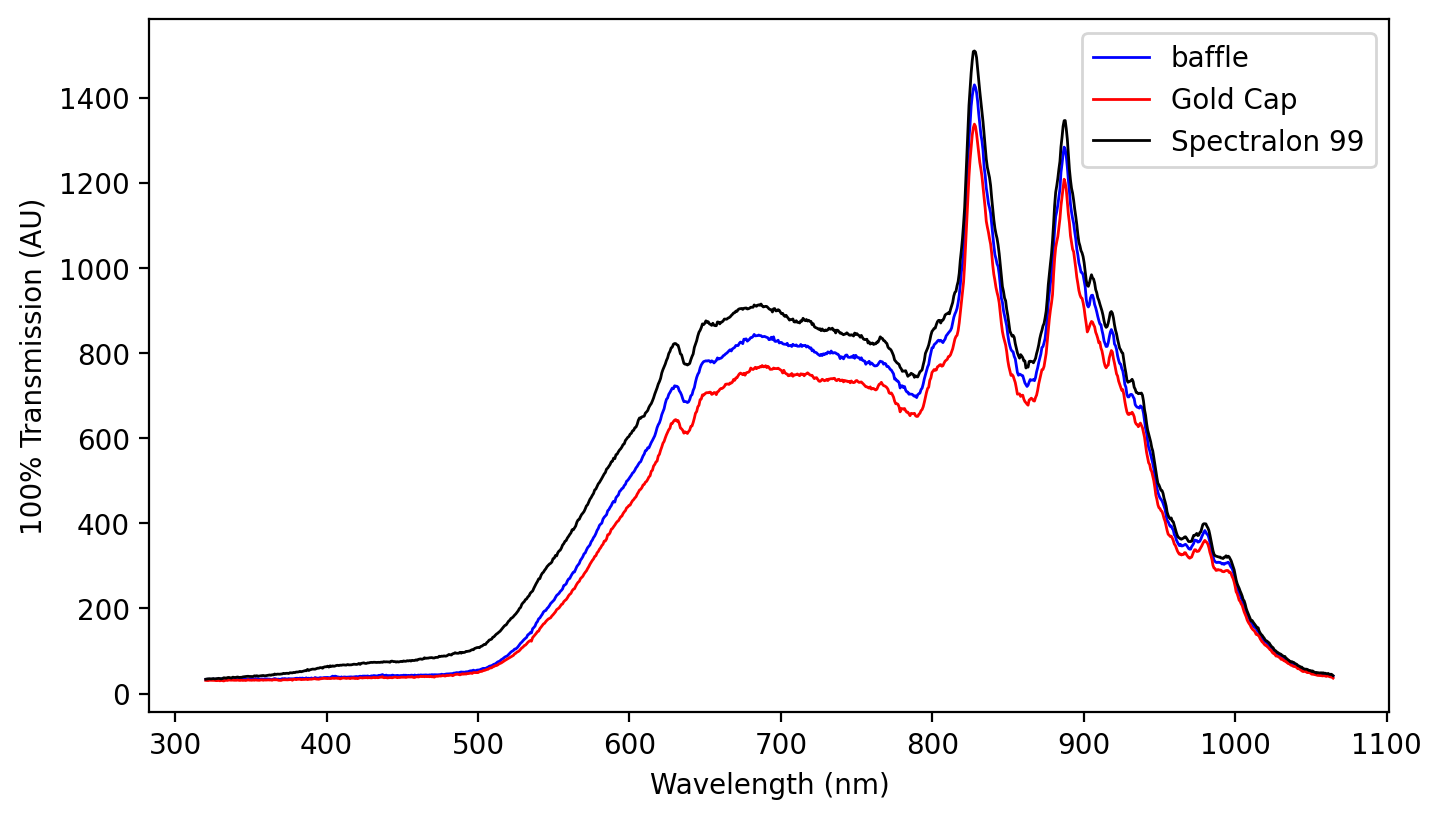

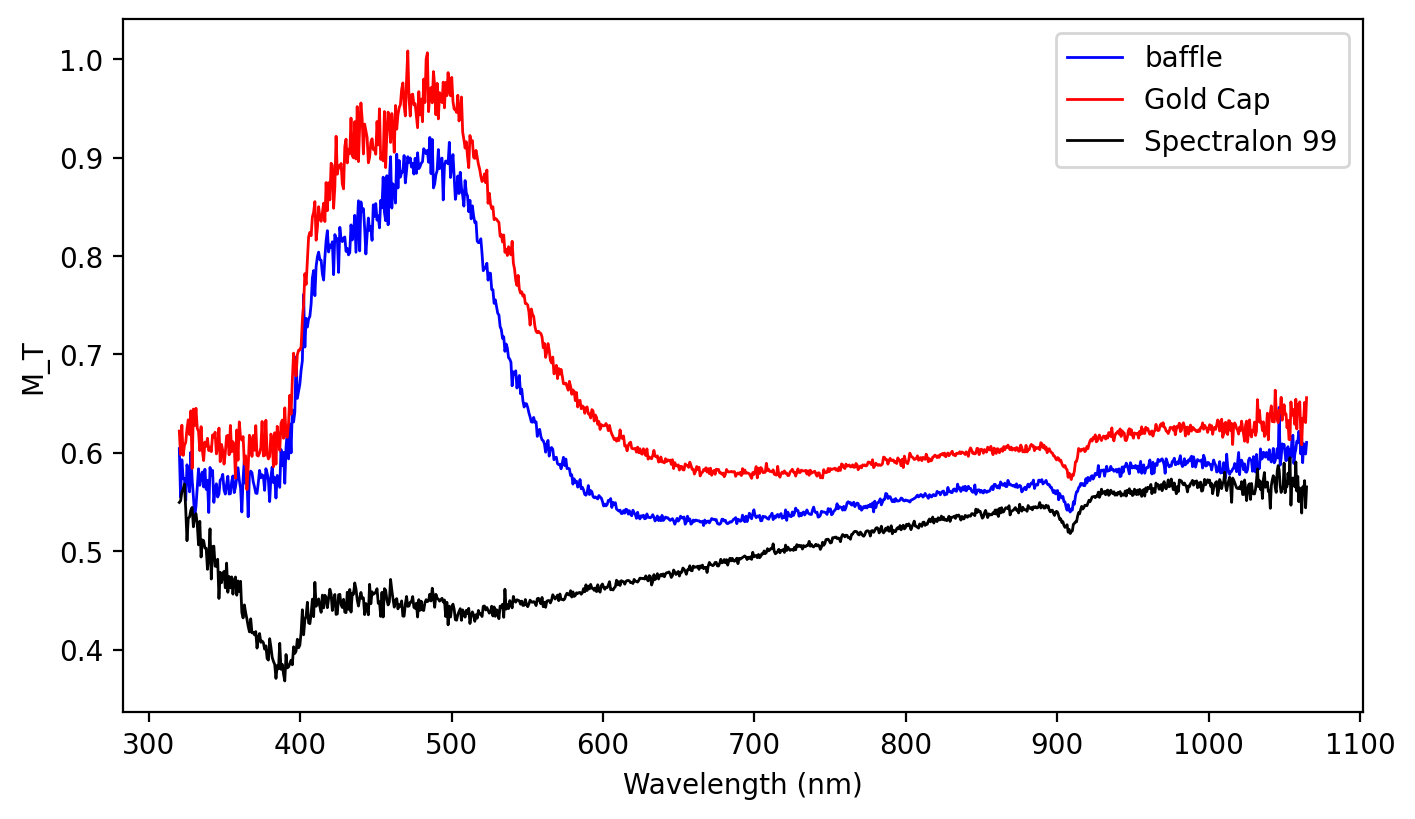

In [2]:
count, lam, pd_baf_sample = np.loadtxt(path + "Ts_baf.txt", max_rows=1000, delimiter=",").T
count, lam, pd_cap_sample = np.loadtxt(path + "Ts_cap.txt", max_rows=1000, delimiter=",").T
count, lam, pd_sl99_sample = np.loadtxt(path + "Ts_sl99.txt", max_rows=1000, delimiter=",").T

count, lam, pd_baf_none = np.loadtxt(path + "T0_baf.txt", max_rows=1000, delimiter=",").T
count, lam, pd_cap_none = np.loadtxt(path + "T0_cap.txt", max_rows=1000, delimiter=",").T
count, lam, pd_sl99_none = np.loadtxt(path + "T0_sl99.txt", max_rows=1000, delimiter=",").T

lam_base = np.copy(lam)
plt.figure(figsize=(8, 4.5))
plt.plot(lam, pd_baf_sample, color="blue", lw=1, label="baffle")
plt.plot(lam, pd_cap_sample, color="red", lw=1, label="Gold Cap")
plt.plot(lam, pd_sl99_sample, color="black", lw=1, label="Spectralon 99")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Sample Transmission (AU)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(lam, pd_baf_none, color="blue", lw=1, label="baffle")
plt.plot(lam, pd_cap_none, color="red", lw=1, label="Gold Cap")
plt.plot(lam, pd_sl99_none, color="black", lw=1, label="Spectralon 99")
plt.xlabel("Wavelength (nm)")
plt.ylabel("100% Transmission (AU)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(lam, pd_baf_sample / pd_baf_none, color="blue", lw=1, label="baffle")
plt.plot(lam, pd_cap_sample / pd_cap_none, color="red", lw=1, label="Gold Cap")
plt.plot(lam, pd_sl99_sample / pd_sl99_none, color="black", lw=1, label="Spectralon 99")
plt.xlabel("Wavelength (nm)")
plt.ylabel("M_T")
plt.legend()
plt.show()

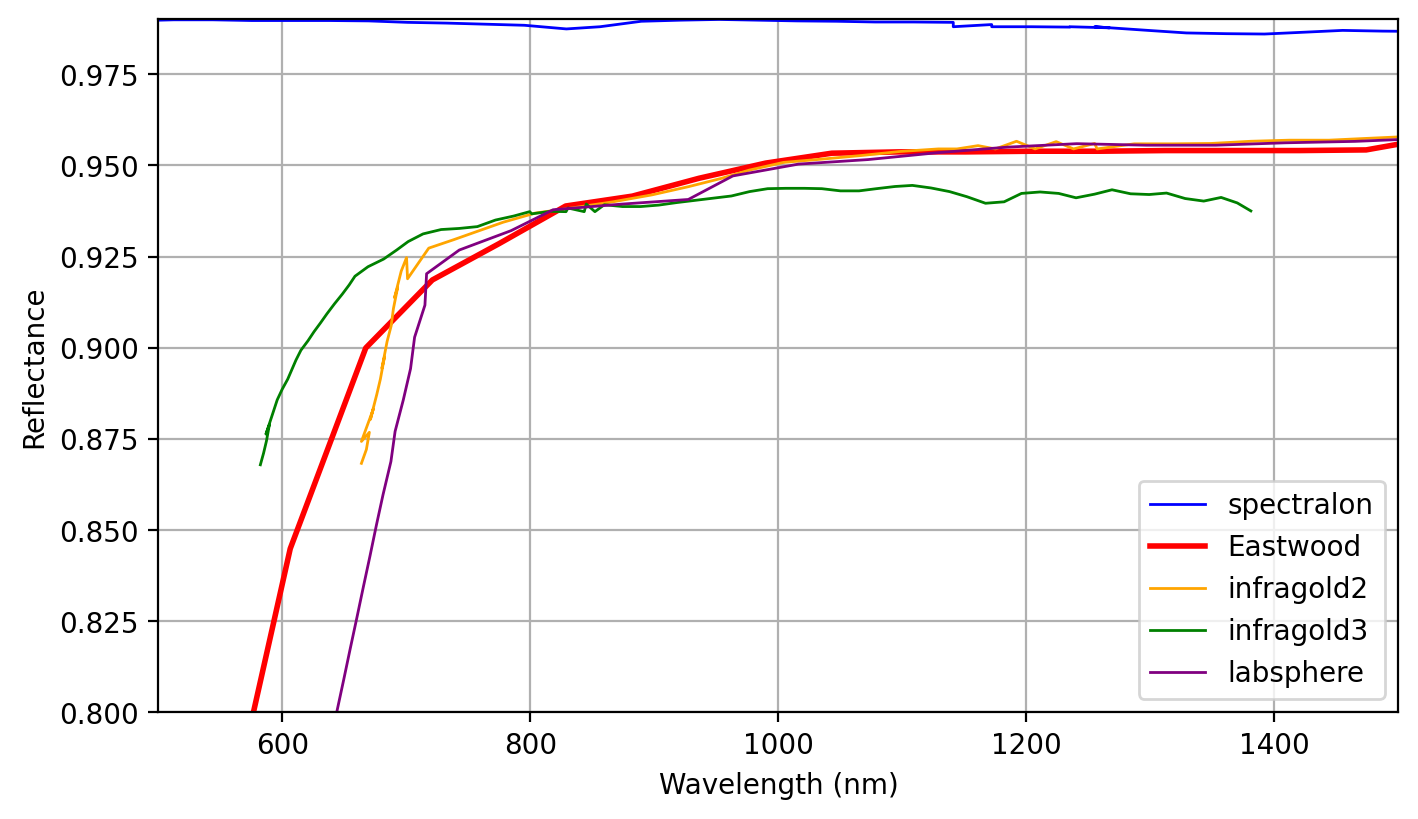

In [3]:
lam_spectralon, r_spectralon = np.loadtxt(path + "spectralon.csv", skiprows=1, delimiter=",").T
lam_infragold, r_infragold = np.loadtxt(path + "infragold.csv", skiprows=1, delimiter=",").T
lam_infragold2, r_infragold2 = np.loadtxt(path + "infragold2.csv", skiprows=1, delimiter=",").T
lam_infragold3, r_infragold3 = np.loadtxt(path + "infragold3.csv", skiprows=1, delimiter=",").T
lam_infragold4, r_infragold4 = np.loadtxt(path + "infragold4.csv", skiprows=1, delimiter=",").T

plt.figure(figsize=(8, 4.5))
plt.plot(lam_spectralon, r_spectralon, color="blue", lw=1, label="spectralon")
plt.plot(lam_infragold, r_infragold * 1.81, color="red", lw=2, label="Eastwood")
plt.plot(lam_infragold2, r_infragold2, color="orange", lw=1, label="infragold2")
plt.plot(lam_infragold3, r_infragold3, color="green", lw=1, label="infragold3")
plt.plot(lam_infragold4, r_infragold4, color="purple", lw=1, label="labsphere")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.xlim(500, 1500)
plt.ylim(0.8, 0.99)
plt.legend()
plt.grid()
plt.show()

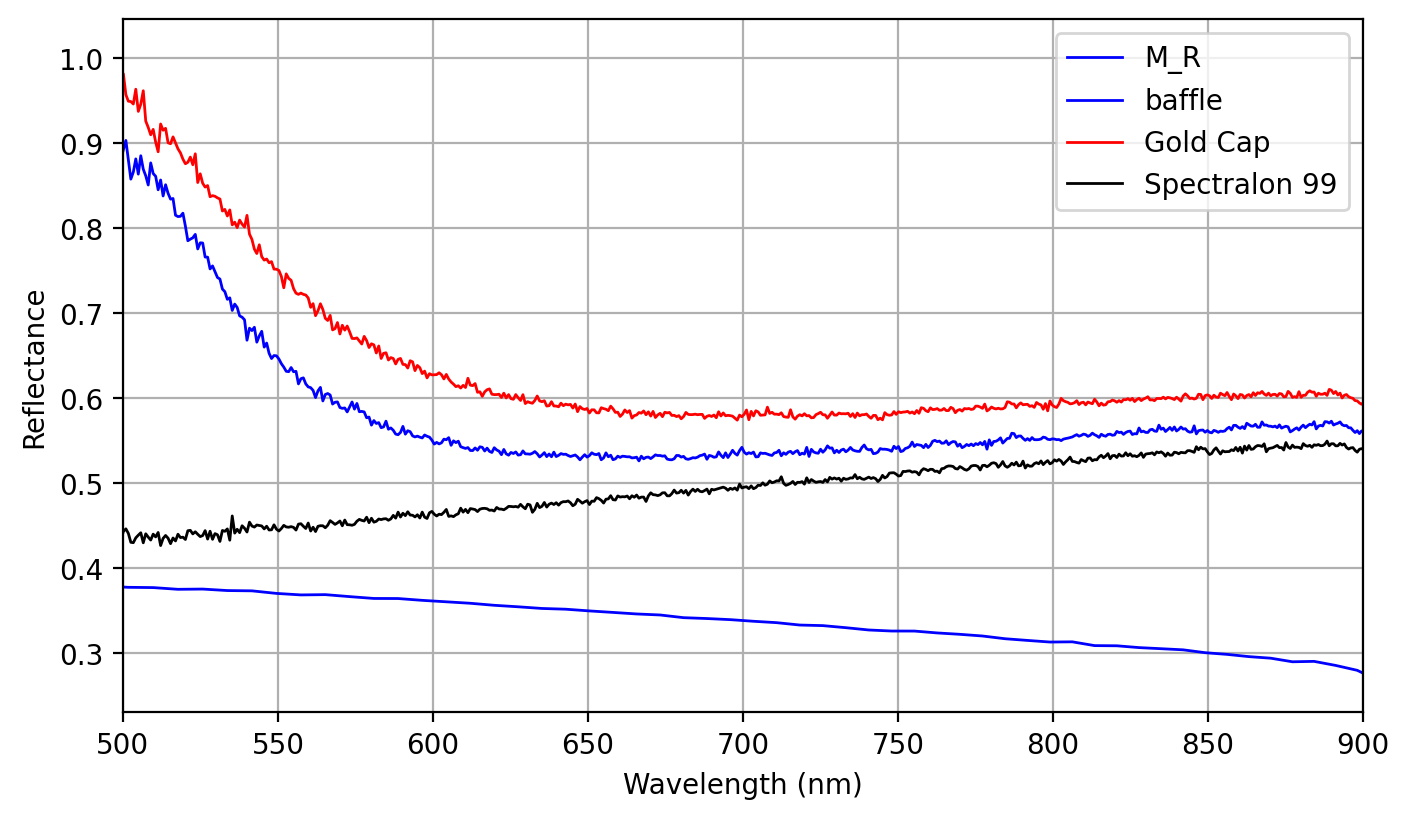

In [4]:
lam_refl, r_refl = np.loadtxt(path + "refl.csv", skiprows=1, delimiter=",").T

plt.figure(figsize=(8, 4.5))
plt.plot(lam_refl, r_refl, color="blue", lw=1, label="M_R")
plt.plot(lam, pd_baf_sample / pd_baf_none, color="blue", lw=1, label="baffle")
plt.plot(lam, pd_cap_sample / pd_cap_none, color="red", lw=1, label="Gold Cap")
plt.plot(lam, pd_sl99_sample / pd_sl99_none, color="black", lw=1, label="Spectralon 99")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.xlim(500, 900)
# plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

In [5]:
def r_spectralon_fn(lam):
    """Interpolate Spectralon reflectance at requested wavelengths.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated Spectralon reflectance at ``lam``.
    """
    return np.interp(lam, lam_spectralon, r_spectralon)


def r_infragold_fn(lam):
    """Interpolate scaled Infragold reflectance at requested wavelengths.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated Infragold reflectance scaled by ``1.81``.
    """
    return np.interp(lam, lam_infragold, r_infragold * 1.81)


def r_sample_fn(lam):
    """Interpolate measured sample reflectance at requested wavelengths.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated sample reflectance at ``lam``.
    """
    return np.interp(lam, lam_refl, r_refl)


def mt_cap_fn(lam):
    """Compute cap transmittance ratio versus wavelength.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated transmittance ratio ``pd_cap_sample / pd_cap_none``.
    """
    return np.interp(lam, lam_base, pd_cap_sample / pd_cap_none)


def mt_baf_fn(lam):
    """Compute baffle transmittance ratio versus wavelength.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated transmittance ratio ``pd_baf_sample / pd_baf_none``.
    """
    return np.interp(lam, lam_base, pd_baf_sample / pd_baf_none)


def mt_sl99_fn(lam):
    """Compute Spectralon-99 transmittance ratio versus wavelength.

    Args:
        lam: Wavelength array (nm).

    Returns:
        Interpolated transmittance ratio ``pd_sl99_sample / pd_sl99_none``.
    """
    return np.interp(lam, lam_base, pd_sl99_sample / pd_sl99_none)

So if we know $P_\text{detector}(\text{sample})$ and $P_\text{detector}(\text{nothing})$ then we can calculate $M_T$ or even UT1.

$$
\text{UT1} = M_T \cdot \frac{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}{ G(\text{URU}, r_\text{standard})}
$$

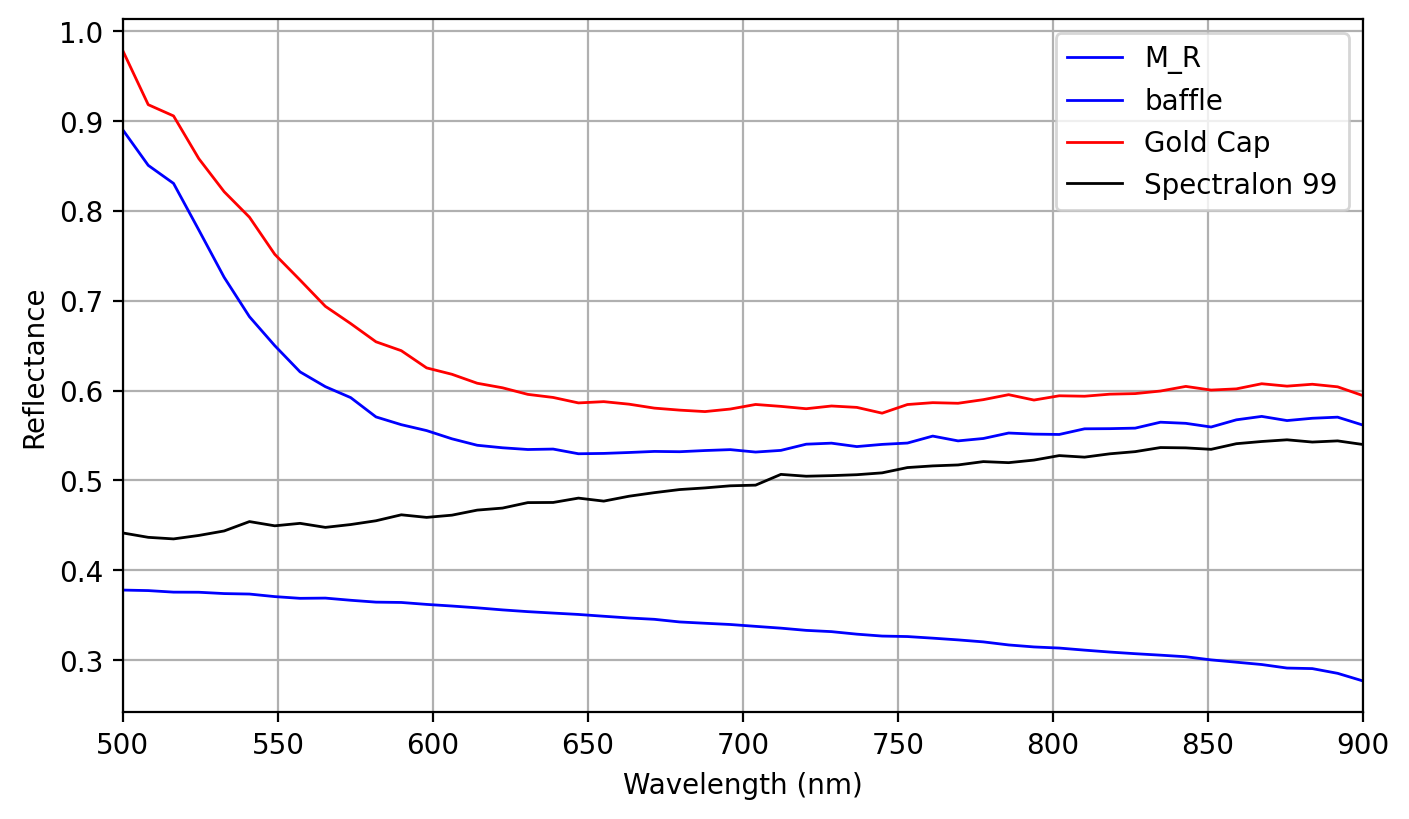

In [6]:
lambda0 = np.linspace(500, 900)
plt.figure(figsize=(8, 4.5))
plt.plot(lambda0, r_sample_fn(lambda0), color="blue", lw=1, label="M_R")
plt.plot(lambda0, mt_baf_fn(lambda0), color="blue", lw=1, label="baffle")
plt.plot(lambda0, mt_cap_fn(lambda0), color="red", lw=1, label="Gold Cap")
plt.plot(lambda0, mt_sl99_fn(lambda0), color="black", lw=1, label="Spectralon 99")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.xlim(500, 900)
# plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

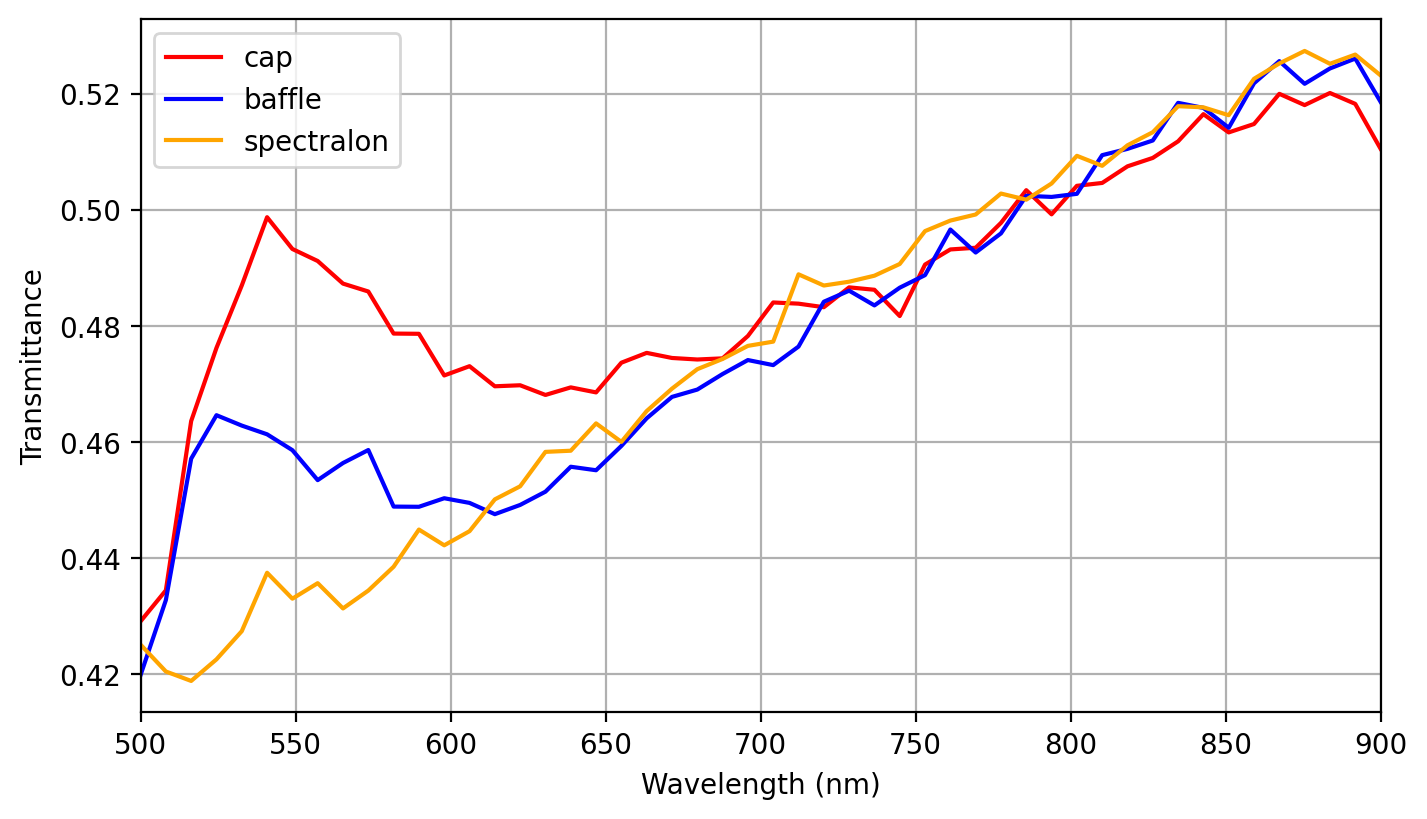

In [7]:
def UT1(s, mt, rstd):
    """Estimate collimated transmittance from sphere measurements.

    Args:
        s: Configured :class:`iadpython.Sphere` instance.
        mt: Measured transmittance signal ratio.
        rstd: Standard reflectance used for calibration.

    Returns:
        Estimated collimated transmittance ``UT1``.
    """
    numer = rstd * (1 - s.sample.a) * s.gain(0, rstd)
    denom = s.gain(s.sample.uru, rstd)
    return mt * numer / denom


R = 25.4 * 2
d_sphere = 2 * R
d_sample = 12.7
d_third = 12.7
d_detector = 2
s = iadpython.Sphere(
    d_sphere,
    d_sample,
    d_third=d_third,
    d_detector=d_detector,
    r_detector=0.1,
    r_wall=0.94,
    r_std=0.97,
)

s.sample.uru = r_sample_fn(lambda0)

ut1_cap = UT1(s, mt_cap_fn(lambda0), r_infragold_fn(lambda0) * 0.93)
ut1_baf = UT1(s, mt_baf_fn(lambda0), r_infragold_fn(lambda0))
ut1_sl99 = UT1(s, mt_sl99_fn(lambda0), r_spectralon_fn(lambda0))

plt.plot(lambda0, ut1_cap, color="red", label="cap")
plt.plot(lambda0, ut1_baf, color="blue", label="baffle")
plt.plot(lambda0, ut1_sl99, color="orange", label="spectralon")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmittance")
plt.xlim(500, 900)
# plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

In [8]:
# simple numerical test to verify correctness of the wall reflectivity equation
def gain(a_s, r_s, a_d, r_d, a_e, r_w):
    """Compute integrating-sphere gain for a given wall reflectance.

    Args:
        a_s: Fractional sample-port area.
        r_s: Sample-port reflectance.
        a_d: Fractional detector-port area.
        r_d: Detector-port reflectance.
        a_e: Fractional entrance-port area.
        r_w: Wall reflectance.

    Returns:
        Integrating-sphere gain factor.
    """
    a_w = 1 - a_e - a_d - a_s
    denom = 1 - r_w * a_w - r_w * (1 - a_e) * (a_d * r_d + a_s * r_s)
    return 1 / denom


def calc_rw(a_s, r_s, a_d, r_d, a_e, gamma):
    """Estimate wall reflectance from measured gain ratio.

    Args:
        a_s: Fractional sample-port area.
        r_s: Sample-port reflectance.
        a_d: Fractional detector-port area.
        r_d: Detector-port reflectance.
        a_e: Fractional entrance-port area.
        gamma: Gain-ratio factor derived from high/low standards.

    Returns:
        Estimated wall reflectance.
    """
    a_w = 1 - a_e - a_d - a_s
    denom = a_w + (1 - a_e) * (a_d * r_d + a_s * r_s * gamma)
    return 1 / denom


d = 100
d_s = 10
d_e = 20
d_d = 5
A = 4 * np.pi * (d / 2) ** 2
a_e = np.pi * (d_e / 2) ** 2 / A
a_d = np.pi * (d_d / 2) ** 2 / A
a_s = np.pi * (d_s / 2) ** 2 / A
r_d = 0.2
r_std = 0.99
r_w = 0.95

p_high = gain(a_s, r_std, a_d, r_d, a_e, r_w)
p_low = gain(a_s, 0, a_d, r_d, a_e, r_w)
gamma = p_high / (p_high - p_low)

RW = calc_rw(a_s, r_std, a_d, r_d, a_e, gamma)
print("calculated wall reflectivity = %8.5f" % RW)
print("  expected wall reflectivity = %8.5f" % r_w)

calculated wall reflectivity =  0.95000
  expected wall reflectivity =  0.95000
